# Part 1 - Machine Learning

Task 1.1 Data preperation

In [70]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import random
import os

df1 = pd.read_csv('AlgerianFF_Region1.csv')
cwd = os.getcwd()
print(cwd)

#print (df1)

C:\Users\PC03


Splitting data for dataset into inputs & targets for Dataset 1

In [71]:
df1_inputs = df1.values[:,:-1].astype(float)
df1_targets = df1.values[:,-1].astype(float)
#print(df1_inputs, df1_targets)

In [72]:
import pandas as pd
df2 = pd.read_csv ('AlgerianFF_Region2.csv')
#print (df2)

Splitting data for dataset into inputs & targets for Dataset 2

In [73]:
print("Second Dataset \n")
df2_inputs = df2.values[:,:-1].astype(float)
df2_targets = df2.values[:,-1].astype(float)
#print(df1_inputs, df1_targets)

Second Dataset 



In [74]:
#combine df1 (dataset1) with df2 (dataset2)
output_data = df1.append(df2)
#print(output_data)

Noramlization

In [75]:
from sklearn import preprocessing

df1_inputs = preprocessing.normalize(df1_inputs)
#print(df1_inputs)


#Scale the inputs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1_inputs)

In [76]:
df2_inputs = preprocessing.normalize(df2_inputs)
#print(df1_inputs)

Task 1.2 Regression 

In [77]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

a) Creation of regression tool for MLPRegressor

In [78]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score



In [79]:
regressor1 = MLPRegressor(solver='lbfgs', max_iter=4000)
regressor1.fit(df1, df1_targets)
outputs = regressor1.predict(df1)
#print("Mean absolute error: ", mean_absolute_error(df1_targets, outputs))

#calculate MAE
REG1_mae = abs(cross_val_score(regressor1, df1_inputs, df1_targets, scoring="neg_mean_absolute_error"))

b) Creation of regression tool for SVR

In [80]:
SVRregressor = SVR()
SVRregressor.fit(df1_inputs, df1_targets)
SVRoutputs = SVRregressor.predict(df1_inputs)

#print("Mean absolute error: ", mean_absolute_error(df1_targets, SVRoutputs))

#calculate MAE
RFreg_mae = abs(cross_val_score(SVRregressor, df1_inputs, df1_targets, scoring="neg_mean_absolute_error")) 

c) Creation of regressor tool for RandomForestRegressor

In [81]:
RandFor_Regressor = RandomForestRegressor()
RandFor_Regressor.fit(df1_inputs, df1_targets)
outputs =  RandFor_Regressor.predict(df1_inputs)

#print("Mean absolute error: ", mean_absolute_error(df1_targets, outputs))

#calculate MAE
RandREG_mae = abs(cross_val_score(RandFor_Regressor, df1_inputs, df1_targets, scoring="neg_mean_absolute_error"))

Task 1.3 Assessment of regression

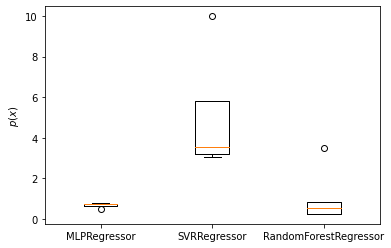

In [82]:
# store mae results into a python array 
import matplotlib.pyplot as plt

maeArray = [REG1_mae, RFreg_mae, RandREG_mae]

REG1 = np.random.rand(100)
REG2 = np.random.randn(100)
REG3 = np.random.rand(100)

plt.figure()
plt.boxplot([REG1_mae, RFreg_mae, RandREG_mae])
plt.xticks([1,2,3], ["MLPRegressor", "SVRRegressor", "RandomForestRegressor"]);
plt.ylabel("$p(x)$")
plt.savefig("boxplot.png", bbox_inches="tight")
plt.show()

# PART 2 – EVOLUTIONARY COMPUTATION

Task 2.1 –Generation of random solutions

In [83]:
distances = pd.read_csv(r'distances.csv', header=None)
#print (distances)

In [84]:
cities = open(r'cities.txt')
test = cities.read().splitlines()
#print(test)

In [85]:
import random
# dislaying distances

def randRoute(distances):
    route = list(range(len(distances)))
    #shuffeling cities
    random.shuffle(route)
    return route
print(randRoute(distances)) # creating a random route


#working out length of route

def route_length(route, dist):
    length = 0 #sets the varaible 'length' to zero
    for i in range(len(route)): # looks through the array
       length += dist.iat[route[i-1], route[i]] # for how many cities are in the route, get distance of first city and next city
    
    return length

x = randRoute(distances)
y = route_length(x, distances)
#print(x)
#print(y)
#x = randRoute(distances)
#print (x)
#y = route_length(x, distances)
#print(y)

[14, 17, 16, 10, 7, 6, 11, 9, 15, 0, 2, 8, 4, 13, 5, 18, 3, 1, 12, 19]


Task 2.2 –Algorithm implementation 

2.2.1 - Creation of Ruin and Recreate function

In [86]:
def ruinAndRecreate(iterations):
    
    RandList = []
    
    bestRoute = randRoute(distances)
    bestRouteLength = route_length(bestRoute, distances)
    
    for i in range(iterations):
        route2 = randRoute(distances)
        print(route2)
        routelength2 = route_length(route2, distances)
        if routelength2 < bestRouteLength:
            bestRouteLength = routelength2
            bestRoute = route2
        RandList.append(bestRouteLength) #iterates through and generates a new route , if it was better than previous routes it becomes the best route is kept till the next iteration 
    return RandList
#print(ruinAndRecreate(30))

2.2.1 - Creation of swap function

In [87]:
def swap(iterations):
   # print("swap Function") # for readability
    
    SwapList = []
    
    bestRoute = randRoute(distances)
    bestRouteLength = route_length(bestRoute, distances)
    
    for i in range(iterations):
        newRoute = bestRoute.copy() # copies the values of bestRoute
        newRouteLength = route_length(newRoute, distances) #records the length of the new route, and gives something to compare what route is more fitter out of the bestroute and newroute
        
        #print("Best route = ", bestRoute, ": Length = ", bestRouteLength) # make sure it works
        
        newRoutePosition1 = random.randint(0, max(newRoute))
        newRoutePosition2 = random.randint(0, max(newRoute))
        
        
        newRoute[newRoutePosition1], newRoute[newRoutePosition2] = newRoute[newRoutePosition2], newRoute[newRoutePosition1]
        #print("New Route = ", newRoute, ": Length = ", newRouteLength)
        newRouteLength = route_length(newRoute, distances)
        
        if(bestRouteLength > newRouteLength):
            bestRoute = newRoute
            bestRouteLength = newRouteLength
        else:
            bestRoute = bestRoute
            bestRouteLength = bestRouteLength
        SwapList.append(bestRouteLength)
        print("Best Route = ", bestRoute, ": Length = ", bestRouteLength)
        
    #print("Best Route = ", route_length(bestRoute, distances))
        
    
    return SwapList

#print(swap(30))

Task 2.3 – Visualisation of results

Best Route =  [17, 3, 15, 11, 14, 9, 5, 16, 1, 18, 8, 13, 19, 10, 2, 0, 12, 4, 6, 7] : Length =  5534.6
Best Route =  [17, 3, 15, 11, 14, 9, 5, 16, 1, 18, 8, 13, 19, 10, 2, 0, 12, 4, 6, 7] : Length =  5534.6
Best Route =  [17, 3, 15, 11, 14, 9, 5, 16, 12, 18, 8, 13, 19, 10, 2, 0, 1, 4, 6, 7] : Length =  5394.8
Best Route =  [17, 3, 15, 11, 14, 9, 5, 16, 12, 18, 8, 13, 19, 10, 2, 0, 1, 4, 6, 7] : Length =  5394.8
Best Route =  [17, 3, 15, 11, 14, 9, 5, 16, 12, 18, 8, 13, 19, 10, 2, 0, 1, 4, 6, 7] : Length =  5394.8
Best Route =  [17, 3, 15, 11, 14, 9, 5, 16, 12, 18, 8, 13, 19, 10, 2, 0, 1, 4, 6, 7] : Length =  5394.8
Best Route =  [17, 3, 15, 11, 14, 9, 5, 16, 12, 18, 8, 13, 19, 10, 2, 0, 1, 4, 6, 7] : Length =  5394.8
Best Route =  [17, 3, 15, 11, 14, 9, 5, 16, 12, 18, 8, 13, 19, 10, 2, 0, 1, 4, 6, 7] : Length =  5394.8
Best Route =  [17, 3, 15, 11, 9, 14, 5, 16, 12, 18, 8, 13, 19, 10, 2, 0, 1, 4, 6, 7] : Length =  5237.8
Best Route =  [17, 3, 15, 8, 9, 14, 5, 16, 12, 18, 11, 13, 19, 1

[18, 19, 12, 13, 2, 3, 17, 0, 5, 7, 16, 14, 9, 4, 8, 6, 1, 11, 10, 15]
[18, 15, 16, 5, 1, 8, 9, 10, 4, 7, 19, 3, 0, 12, 6, 17, 13, 14, 2, 11]
[4, 13, 7, 11, 17, 16, 2, 9, 0, 10, 18, 3, 1, 12, 15, 6, 5, 14, 19, 8]
[8, 7, 4, 18, 16, 10, 17, 13, 19, 1, 15, 11, 0, 14, 9, 6, 12, 2, 5, 3]
[3, 7, 16, 9, 1, 17, 12, 15, 14, 5, 8, 0, 4, 6, 2, 18, 11, 19, 13, 10]
[9, 14, 5, 10, 8, 6, 11, 18, 2, 3, 0, 12, 13, 19, 1, 4, 16, 17, 7, 15]
[8, 9, 17, 6, 19, 5, 4, 0, 1, 7, 2, 11, 14, 10, 3, 18, 12, 15, 16, 13]
[17, 3, 14, 2, 12, 6, 16, 5, 7, 19, 15, 0, 1, 10, 8, 11, 9, 4, 18, 13]
[12, 6, 3, 4, 13, 14, 10, 11, 7, 16, 5, 2, 15, 19, 1, 0, 9, 8, 17, 18]
[12, 18, 5, 15, 1, 19, 17, 4, 8, 2, 7, 9, 3, 6, 0, 11, 16, 13, 10, 14]
[17, 10, 1, 9, 14, 11, 2, 3, 7, 18, 5, 8, 15, 6, 0, 13, 19, 4, 12, 16]
[16, 11, 7, 2, 12, 9, 8, 18, 5, 15, 4, 17, 13, 1, 14, 19, 6, 0, 10, 3]
[0, 7, 15, 11, 3, 12, 6, 9, 10, 14, 13, 4, 2, 16, 5, 19, 8, 17, 1, 18]
[19, 16, 18, 8, 6, 0, 11, 15, 3, 2, 4, 12, 1, 5, 13, 17, 7, 9, 14, 10]
[4, 18

Best Route =  [18, 0, 11, 9, 14, 1, 4, 5, 8, 12, 3, 15, 17, 10, 16, 13, 19, 2, 6, 7] : Length =  5179.9
Best Route =  [18, 0, 11, 9, 14, 1, 4, 5, 8, 12, 3, 15, 17, 10, 16, 13, 19, 2, 6, 7] : Length =  5179.9
Best Route =  [18, 0, 11, 9, 14, 19, 4, 5, 8, 12, 3, 15, 17, 10, 16, 13, 1, 2, 6, 7] : Length =  5073.3
Best Route =  [18, 0, 11, 9, 14, 19, 4, 5, 8, 12, 3, 15, 17, 10, 16, 13, 1, 2, 6, 7] : Length =  5073.3
Best Route =  [18, 0, 11, 9, 14, 19, 4, 5, 8, 12, 3, 15, 17, 10, 16, 13, 1, 2, 6, 7] : Length =  5073.3
Best Route =  [18, 0, 11, 9, 14, 19, 4, 5, 8, 12, 3, 15, 17, 10, 16, 13, 1, 2, 6, 7] : Length =  5073.3
Best Route =  [17, 0, 11, 9, 14, 19, 4, 5, 8, 12, 3, 15, 18, 10, 16, 13, 1, 2, 6, 7] : Length =  5045.5
Best Route =  [17, 0, 11, 9, 14, 19, 4, 5, 8, 12, 3, 15, 18, 10, 16, 13, 1, 2, 6, 7] : Length =  5045.5
Best Route =  [17, 0, 11, 9, 14, 19, 4, 5, 8, 12, 3, 15, 18, 10, 16, 13, 1, 2, 6, 7] : Length =  5045.5
Best Route =  [17, 0, 11, 9, 14, 19, 4, 5, 8, 12, 3, 15, 18, 10,

Best Route =  [12, 11, 14, 16, 7, 6, 3, 1, 15, 10, 8, 17, 5, 0, 9, 2, 19, 13, 4, 18] : Length =  4668.1
Best Route =  [12, 11, 14, 16, 7, 6, 3, 1, 15, 10, 8, 17, 5, 0, 9, 2, 19, 13, 4, 18] : Length =  4668.1
Best Route =  [12, 11, 14, 16, 7, 6, 3, 1, 15, 10, 8, 17, 5, 0, 9, 2, 19, 13, 4, 18] : Length =  4668.1
Best Route =  [12, 11, 14, 16, 7, 6, 3, 1, 15, 10, 8, 17, 5, 0, 9, 2, 19, 13, 4, 18] : Length =  4668.1
Best Route =  [12, 11, 14, 16, 7, 6, 3, 1, 15, 10, 8, 17, 5, 0, 9, 2, 19, 13, 4, 18] : Length =  4668.1
Best Route =  [12, 11, 14, 16, 7, 6, 3, 1, 15, 10, 8, 17, 5, 2, 9, 0, 19, 13, 4, 18] : Length =  4660.1
Best Route =  [12, 11, 0, 16, 7, 6, 3, 1, 15, 10, 8, 17, 5, 2, 9, 14, 19, 13, 4, 18] : Length =  4565.1
Best Route =  [12, 11, 0, 16, 7, 6, 3, 1, 15, 10, 8, 17, 5, 2, 9, 14, 19, 13, 4, 18] : Length =  4565.1
Best Route =  [12, 11, 0, 16, 7, 6, 3, 1, 15, 10, 8, 17, 5, 2, 9, 14, 19, 13, 4, 18] : Length =  4565.1
Best Route =  [12, 17, 0, 16, 7, 6, 3, 1, 15, 10, 8, 11, 5, 2, 9

Best Route =  [16, 17, 11, 1, 14, 2, 5, 9, 10, 0, 4, 13, 12, 3, 6, 19, 15, 18, 8, 7] : Length =  4558.7
Best Route =  [16, 17, 11, 1, 14, 2, 5, 9, 10, 0, 4, 13, 12, 3, 6, 19, 15, 18, 8, 7] : Length =  4558.7
Best Route =  [16, 17, 11, 1, 14, 2, 5, 9, 10, 0, 4, 13, 12, 3, 6, 19, 15, 18, 8, 7] : Length =  4558.7
Best Route =  [16, 17, 11, 1, 14, 2, 5, 9, 10, 0, 8, 13, 12, 3, 6, 19, 15, 18, 4, 7] : Length =  4272.7
Best Route =  [16, 17, 11, 1, 14, 2, 5, 9, 10, 0, 8, 13, 12, 3, 6, 19, 15, 18, 4, 7] : Length =  4272.7
Best Route =  [16, 17, 11, 1, 14, 2, 5, 9, 10, 0, 8, 13, 12, 3, 6, 19, 15, 18, 4, 7] : Length =  4272.7
Best Route =  [16, 17, 11, 1, 14, 2, 5, 9, 10, 0, 8, 13, 12, 3, 6, 19, 15, 18, 4, 7] : Length =  4272.7
Best Route =  [16, 17, 11, 1, 14, 2, 5, 9, 10, 0, 8, 13, 12, 3, 6, 19, 15, 18, 4, 7] : Length =  4272.7
Best Route =  [16, 17, 11, 1, 14, 2, 5, 9, 10, 0, 8, 13, 12, 3, 6, 19, 15, 18, 4, 7] : Length =  4272.7
Best Route =  [16, 17, 11, 1, 14, 2, 5, 9, 10, 0, 8, 13, 12, 3, 

[9, 8, 12, 7, 13, 15, 6, 3, 1, 2, 17, 5, 4, 11, 18, 10, 14, 19, 0, 16]
[3, 13, 14, 1, 8, 16, 6, 9, 12, 4, 11, 7, 5, 2, 15, 19, 10, 17, 0, 18]
[14, 13, 10, 17, 5, 18, 4, 19, 7, 0, 2, 15, 12, 1, 3, 9, 16, 8, 6, 11]
[10, 2, 14, 4, 3, 0, 18, 6, 11, 19, 13, 12, 8, 9, 15, 5, 17, 1, 7, 16]
[13, 5, 10, 12, 15, 16, 18, 14, 17, 6, 2, 1, 0, 11, 3, 4, 19, 9, 7, 8]
[13, 5, 6, 8, 1, 11, 10, 9, 17, 18, 4, 19, 16, 12, 0, 7, 14, 3, 2, 15]
[1, 16, 7, 11, 18, 3, 2, 10, 17, 8, 6, 0, 15, 12, 14, 13, 5, 4, 9, 19]
[14, 13, 17, 6, 7, 19, 0, 1, 16, 15, 18, 9, 3, 10, 5, 8, 2, 12, 11, 4]
[5, 12, 19, 18, 17, 13, 16, 10, 15, 1, 8, 0, 2, 14, 6, 4, 11, 9, 7, 3]
[18, 5, 12, 11, 3, 7, 10, 4, 17, 2, 19, 14, 9, 15, 0, 13, 6, 1, 16, 8]
[19, 7, 17, 2, 4, 6, 3, 10, 15, 0, 11, 12, 14, 1, 18, 5, 9, 16, 13, 8]
[8, 3, 19, 2, 0, 14, 18, 11, 5, 13, 15, 17, 1, 6, 16, 9, 4, 12, 10, 7]
[2, 10, 6, 4, 8, 7, 17, 3, 18, 19, 0, 13, 9, 5, 14, 15, 1, 16, 11, 12]
[9, 12, 7, 10, 1, 3, 18, 2, 19, 0, 15, 17, 5, 6, 16, 4, 13, 8, 14, 11]
[10, 1

Best Route =  [2, 3, 11, 12, 16, 1, 13, 4, 5, 10, 15, 7, 9, 0, 8, 14, 18, 17, 6, 19] : Length =  4654.0
Best Route =  [2, 3, 11, 12, 10, 1, 13, 4, 5, 16, 15, 7, 9, 0, 8, 14, 18, 17, 6, 19] : Length =  4585.0
Best Route =  [2, 3, 14, 12, 10, 1, 13, 4, 5, 16, 15, 7, 9, 0, 8, 11, 18, 17, 6, 19] : Length =  4513.4
Best Route =  [2, 3, 14, 12, 10, 1, 13, 4, 5, 16, 15, 7, 9, 0, 8, 11, 18, 17, 6, 19] : Length =  4513.4
Best Route =  [2, 3, 14, 12, 10, 1, 13, 4, 5, 16, 15, 7, 9, 0, 8, 11, 18, 17, 6, 19] : Length =  4513.4
Best Route =  [2, 3, 14, 12, 10, 1, 13, 4, 5, 16, 15, 7, 9, 0, 8, 11, 18, 17, 6, 19] : Length =  4513.4
Best Route =  [2, 3, 14, 12, 10, 1, 13, 4, 5, 6, 15, 7, 9, 0, 8, 11, 18, 17, 16, 19] : Length =  3875.4
Best Route =  [2, 3, 14, 12, 10, 1, 13, 4, 5, 6, 15, 8, 9, 0, 7, 11, 18, 17, 16, 19] : Length =  3871.4
Best Route =  [2, 3, 14, 12, 10, 1, 13, 4, 5, 6, 15, 8, 9, 0, 7, 11, 18, 17, 16, 19] : Length =  3871.4
Best Route =  [2, 3, 14, 12, 10, 1, 13, 4, 5, 6, 15, 8, 9, 0, 7,

Best Route =  [8, 17, 7, 11, 12, 6, 13, 19, 1, 18, 9, 10, 5, 16, 0, 14, 4, 2, 3, 15] : Length =  5448.7
Best Route =  [8, 17, 7, 11, 12, 6, 13, 19, 1, 18, 9, 10, 5, 16, 0, 14, 4, 2, 3, 15] : Length =  5448.7
Best Route =  [8, 17, 7, 11, 12, 6, 13, 19, 1, 18, 9, 10, 5, 16, 0, 14, 3, 2, 4, 15] : Length =  5444.7
Best Route =  [8, 17, 7, 11, 12, 6, 13, 19, 1, 18, 9, 10, 5, 16, 0, 14, 3, 2, 4, 15] : Length =  5444.7
Best Route =  [8, 17, 7, 11, 12, 6, 19, 13, 1, 18, 9, 10, 5, 16, 0, 14, 3, 2, 4, 15] : Length =  5410.7
Best Route =  [8, 17, 7, 11, 12, 6, 19, 13, 1, 18, 9, 10, 5, 16, 0, 14, 3, 2, 4, 15] : Length =  5410.7
Best Route =  [8, 17, 7, 11, 12, 6, 19, 13, 1, 18, 9, 10, 5, 16, 0, 14, 3, 2, 4, 15] : Length =  5410.7
Best Route =  [8, 17, 7, 11, 12, 19, 6, 13, 1, 18, 9, 10, 5, 16, 0, 14, 3, 2, 4, 15] : Length =  5410.1
Best Route =  [8, 17, 7, 11, 12, 19, 6, 13, 1, 18, 9, 10, 5, 16, 0, 14, 3, 2, 4, 15] : Length =  5410.1
Best Route =  [8, 17, 7, 11, 12, 19, 6, 13, 1, 18, 15, 10, 5, 16

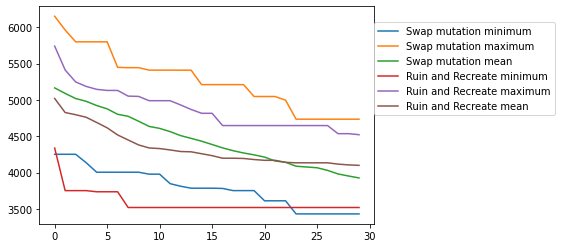

In [88]:
import numpy

def results():
    SwapList = []
    RuinNRecreateList = []
    
    for i in range(30):
        SwapList.append(swap(30))
        RuinNRecreateList.append(ruinAndRecreate(30))
        
        # turning both lists into numpy arrays because it works out max , min and average calculations
        Array1 = numpy.array(SwapList) 
        Array2 = numpy.array(RuinNRecreateList)

    plt.plot(Array1.min(axis=0))
    plt.plot(Array1.max(axis=0))
    plt.plot(Array1.mean(axis=0))
    
    plt.plot(Array2.min(axis=0))
    plt.plot(Array2.max(axis=0))
    plt.plot(Array2.mean(axis=0))
    plt.legend(["Swap mutation minimum","Swap mutation maximum", "Swap mutation mean", "Ruin and Recreate minimum", "Ruin and Recreate maximum", "Ruin and Recreate mean"], loc=(1,0.5))
    plt.show()
    
results()

The best mutation operator for the traveling saleman problem is the swap function because on the graph the mean value is seen traveling downwards at a faster and more reliable rate , where as the Ruin and recreate is slower. 

# Part 2 - EVOLUTIONARY COMPUTATION with Short Datasets

Importing csv files

In [89]:
distancesShort = pd.read_csv(r'distances_short_corrected.csv', header=None)
#print(distancesShort)

In [90]:
citiesShort = open(r'cities_short_corrected.csv')
test = citiesShort.read().splitlines()
#print(test)

Task 2.1 - Generation of random solutions

In [91]:
def randRouteShort(distancesShort):
    routeShort = list(range(len(distancesShort)))
    #shuffeling cities
    random.shuffle(routeShort)
    return routeShort
print(randRouteShort(distancesShort)) # creating a random route


#working out length of route

def route_lengthShort(routeShort, distancesShort):
    lengthShort = 0 #sets the varaible 'length' to zero
    for i in range(len(routeShort)): # looks through the array
       lengthShort += distancesShort.iat[routeShort[i-1], routeShort[i]] # for how many cities are in the route, get distance of first city and next city
    
    return lengthShort

x = randRouteShort(distancesShort)
y = route_lengthShort(x, distancesShort)
#print(x)
#print(y)

[2, 1, 3, 0, 4]


Task 2.2.1 - Ruin and Recreate mutation function

In [92]:
def ruinAndRecreateShort(iterations):
    
    RandList = []
    
    bestRouteShort = randRouteShort(distancesShort)
    bestRouteLengthShort = route_lengthShort(bestRouteShort, distancesShort)
    
    for i in range(iterations):
        route2 = randRouteShort(distancesShort)
        print(route2)
        routelength2 = route_lengthShort(route2, distancesShort)
        if routelength2 < bestRouteLengthShort:
            bestRouteLengthShort = routelength2
            bestRouteShort = route2
        RandList.append(bestRouteLengthShort) #iterates through and generates a new route , if it was better than previous routes it becomes the best route is kept till the next iteration 
    return RandList
#print(ruinAndRecreateShort(30))

Task 2.2.2 - Swap mutation function

In [93]:
def swapShort(iterations):
    print("swap Function") # for readability
    
    SwapList = []
    
    bestRouteShort = randRouteShort(distancesShort)
    bestRouteLengthShort = route_lengthShort(bestRouteShort, distancesShort)
    
    for i in range(iterations):
        newRouteShort = bestRouteShort.copy() # copies the values of bestRoute
        newRouteLengthShort = route_lengthShort(newRouteShort, distancesShort) #records the length of the new route, and gives something to compare what route is more fitter out of the bestroute and newroute
        
        print("Best route Short = ", bestRouteShort, ": Length Short = ", bestRouteLengthShort) # make sure it works
        
        newShortRoutePosition1 = random.randint(0, max(newRouteShort))
        newShortRoutePosition2 = random.randint(0, max(newRouteShort))
        
        
        newRouteShort[newShortRoutePosition1], newRouteShort[newShortRoutePosition2] = newRouteShort[newShortRoutePosition2], newRouteShort[newShortRoutePosition1]
        print("New Route Short = ", newRouteShort, ": Length Short= ", newRouteLengthShort)
        newRouteLengthShort = route_lengthShort(newRouteShort, distancesShort)
        
        if(bestRouteLengthShort > newRouteLengthShort):
            bestRouteShort = newRouteShort
            bestRouteLengthShort = newRouteLengthShort
        else:
            bestRouteShort = bestRouteShort
            bestRouteLengthShort = bestRouteLengthShort
        SwapList.append(bestRouteLengthShort)
        print("Best Route Short = ", bestRouteShort, ": Length Short= ", bestRouteLengthShort)
        
    print("Best Route Short = ", route_lengthShort(bestRouteShort, distancesShort))
        
    
    return SwapList

#print(swapShort(30))

Task 2.3 - Visualisation of results 

Best Route =  [17, 13, 2, 14, 9, 16, 4, 10, 7, 8, 18, 0, 6, 5, 3, 19, 1, 12, 15, 11] : Length =  4347.9
Best Route =  [17, 13, 2, 14, 9, 16, 4, 10, 7, 8, 18, 0, 6, 5, 3, 19, 1, 12, 15, 11] : Length =  4347.9
Best Route =  [17, 13, 2, 14, 9, 16, 4, 10, 7, 8, 18, 0, 6, 5, 3, 19, 1, 12, 15, 11] : Length =  4347.9
Best Route =  [17, 13, 2, 14, 18, 16, 4, 10, 7, 8, 9, 0, 6, 5, 3, 19, 1, 12, 15, 11] : Length =  3969.8999999999996
Best Route =  [17, 13, 2, 14, 18, 16, 4, 10, 7, 8, 9, 0, 6, 5, 3, 19, 1, 12, 15, 11] : Length =  3969.8999999999996
Best Route =  [17, 13, 2, 14, 18, 16, 4, 10, 7, 8, 9, 0, 6, 5, 3, 19, 1, 12, 15, 11] : Length =  3969.8999999999996
Best Route =  [17, 13, 2, 14, 18, 16, 4, 10, 7, 8, 9, 0, 6, 5, 3, 19, 1, 12, 15, 11] : Length =  3969.8999999999996
Best Route =  [17, 13, 2, 14, 18, 16, 4, 10, 7, 8, 9, 0, 6, 5, 3, 19, 1, 12, 15, 11] : Length =  3969.8999999999996
Best Route =  [17, 13, 2, 14, 18, 16, 4, 10, 7, 8, 9, 0, 6, 5, 3, 19, 1, 12, 15, 11] : Length =  3969.899999

[9, 10, 12, 0, 16, 8, 5, 17, 3, 6, 11, 13, 15, 2, 7, 4, 19, 14, 1, 18]
[15, 1, 7, 11, 14, 19, 3, 8, 10, 16, 5, 6, 0, 18, 2, 9, 12, 4, 13, 17]
[8, 12, 14, 17, 19, 3, 13, 10, 16, 2, 11, 15, 0, 7, 18, 4, 6, 5, 1, 9]
[7, 12, 11, 6, 9, 10, 2, 5, 14, 16, 0, 4, 1, 3, 19, 18, 8, 15, 13, 17]
[10, 7, 19, 13, 15, 0, 3, 2, 12, 18, 17, 16, 14, 9, 8, 11, 6, 5, 4, 1]
[17, 0, 12, 7, 19, 18, 11, 8, 2, 3, 4, 13, 9, 10, 1, 16, 14, 15, 5, 6]
[4, 0, 13, 18, 7, 8, 9, 12, 15, 19, 17, 16, 10, 2, 11, 14, 1, 6, 5, 3]
[13, 0, 8, 15, 7, 2, 4, 5, 14, 19, 18, 1, 9, 3, 11, 10, 12, 6, 17, 16]
[13, 18, 17, 19, 9, 7, 0, 16, 3, 10, 6, 11, 8, 1, 5, 14, 12, 15, 4, 2]
[12, 15, 18, 7, 19, 13, 3, 10, 0, 17, 8, 6, 11, 16, 1, 9, 4, 2, 14, 5]
[19, 12, 13, 18, 4, 1, 6, 5, 16, 14, 11, 0, 8, 15, 7, 3, 9, 2, 10, 17]
[13, 9, 3, 15, 19, 4, 1, 0, 2, 8, 12, 7, 18, 14, 6, 16, 11, 5, 10, 17]
[19, 9, 17, 11, 12, 4, 6, 13, 8, 10, 15, 0, 16, 14, 5, 3, 18, 7, 2, 1]
[15, 17, 7, 1, 16, 10, 6, 5, 9, 18, 19, 12, 4, 8, 0, 3, 11, 14, 13, 2]
[0, 5,

[9, 17, 19, 13, 10, 6, 7, 5, 4, 8, 16, 12, 1, 11, 15, 18, 0, 2, 3, 14]
[4, 0, 1, 6, 2, 19, 12, 7, 3, 15, 16, 11, 9, 13, 8, 14, 18, 5, 10, 17]
[2, 11, 5, 19, 1, 9, 10, 0, 7, 16, 4, 14, 15, 17, 12, 6, 13, 8, 18, 3]
[16, 12, 2, 19, 3, 10, 4, 0, 11, 14, 7, 8, 9, 13, 18, 15, 5, 17, 1, 6]
[14, 2, 16, 3, 8, 13, 1, 11, 18, 17, 19, 7, 15, 6, 5, 4, 9, 0, 12, 10]
[5, 18, 17, 1, 12, 11, 2, 7, 4, 15, 13, 9, 6, 14, 0, 19, 16, 3, 8, 10]
[4, 14, 12, 15, 11, 0, 5, 10, 3, 1, 6, 16, 7, 2, 8, 13, 19, 17, 18, 9]
[17, 1, 11, 7, 6, 10, 14, 12, 4, 8, 15, 13, 0, 19, 9, 16, 2, 5, 3, 18]
[4, 6, 10, 19, 12, 18, 11, 1, 15, 13, 5, 2, 8, 9, 17, 3, 0, 14, 16, 7]
[6, 2, 0, 10, 8, 17, 9, 4, 7, 18, 15, 16, 12, 13, 14, 1, 11, 19, 3, 5]
[2, 17, 0, 7, 16, 3, 6, 4, 18, 13, 19, 11, 10, 8, 1, 14, 9, 12, 5, 15]
[14, 9, 8, 11, 13, 6, 3, 18, 7, 2, 0, 10, 17, 12, 1, 16, 4, 19, 15, 5]
[16, 7, 12, 6, 13, 17, 1, 5, 19, 15, 10, 18, 0, 3, 14, 2, 11, 4, 8, 9]
[15, 19, 3, 9, 5, 1, 16, 17, 4, 18, 10, 14, 2, 12, 7, 11, 0, 13, 8, 6]
[10, 6

Best Route =  [17, 10, 9, 0, 15, 2, 18, 6, 4, 7, 16, 8, 19, 11, 12, 14, 1, 13, 5, 3] : Length =  4007.8
Best Route =  [17, 10, 9, 0, 15, 2, 18, 6, 4, 7, 16, 8, 19, 11, 12, 14, 1, 13, 5, 3] : Length =  4007.8
Best Route =  [17, 10, 9, 0, 15, 2, 18, 6, 4, 7, 16, 8, 19, 11, 12, 14, 1, 13, 5, 3] : Length =  4007.8
Best Route =  [17, 10, 9, 0, 15, 2, 18, 6, 4, 7, 16, 8, 19, 11, 12, 14, 1, 13, 5, 3] : Length =  4007.8
Best Route =  [17, 10, 9, 0, 15, 2, 18, 6, 4, 7, 16, 8, 19, 11, 12, 14, 1, 13, 5, 3] : Length =  4007.8
Best Route =  [17, 10, 9, 0, 15, 2, 18, 6, 4, 7, 16, 8, 19, 11, 12, 14, 1, 13, 5, 3] : Length =  4007.8
Best Route =  [17, 10, 9, 0, 15, 2, 18, 6, 4, 7, 16, 8, 19, 11, 12, 14, 1, 13, 5, 3] : Length =  4007.8
Best Route =  [17, 10, 9, 0, 15, 2, 18, 6, 4, 7, 16, 8, 19, 11, 12, 14, 1, 13, 5, 3] : Length =  4007.8
Best Route =  [17, 10, 9, 0, 15, 2, 18, 6, 4, 7, 16, 8, 19, 11, 12, 14, 1, 13, 5, 3] : Length =  4007.8
Best Route =  [17, 10, 9, 0, 15, 2, 18, 6, 4, 7, 16, 8, 19, 11, 

Best Route =  [18, 11, 3, 14, 2, 8, 9, 0, 17, 13, 1, 5, 6, 4, 15, 7, 12, 10, 16, 19] : Length =  3863.6
Best Route =  [18, 11, 3, 14, 2, 8, 9, 0, 17, 13, 1, 5, 6, 4, 15, 7, 12, 10, 16, 19] : Length =  3863.6
Best Route =  [18, 11, 3, 14, 2, 8, 9, 0, 17, 13, 1, 5, 6, 4, 15, 7, 12, 10, 16, 19] : Length =  3863.6
Best Route =  [18, 11, 3, 14, 2, 8, 9, 0, 17, 13, 1, 5, 6, 4, 15, 7, 12, 10, 16, 19] : Length =  3863.6
Best Route =  [18, 11, 3, 14, 2, 8, 9, 0, 17, 13, 1, 5, 6, 4, 15, 7, 12, 10, 16, 19] : Length =  3863.6
Best Route =  [18, 11, 3, 14, 2, 8, 9, 0, 17, 13, 1, 5, 6, 4, 15, 7, 12, 10, 16, 19] : Length =  3863.6
Best Route =  [18, 11, 3, 14, 2, 17, 9, 0, 8, 13, 1, 5, 6, 4, 15, 7, 12, 10, 16, 19] : Length =  3844.8
Best Route =  [15, 11, 3, 14, 2, 17, 9, 0, 8, 13, 1, 5, 6, 4, 18, 7, 12, 10, 16, 19] : Length =  3699.5000000000005
Best Route =  [15, 11, 3, 14, 2, 17, 1, 0, 8, 13, 9, 5, 6, 4, 18, 7, 12, 10, 16, 19] : Length =  3645.5000000000005
Best Route =  [15, 11, 3, 14, 2, 17, 1, 

Best Route =  [5, 12, 15, 18, 0, 9, 19, 2, 1, 14, 10, 16, 6, 4, 3, 13, 11, 17, 7, 8] : Length =  4377.6
Best Route =  [5, 12, 15, 18, 0, 9, 19, 2, 1, 14, 10, 16, 6, 4, 3, 13, 11, 17, 7, 8] : Length =  4377.6
Best Route =  [5, 12, 15, 18, 0, 9, 19, 2, 1, 14, 10, 16, 6, 4, 3, 13, 11, 17, 7, 8] : Length =  4377.6
Best Route =  [5, 12, 15, 18, 0, 9, 19, 2, 1, 14, 10, 16, 6, 4, 3, 13, 11, 17, 7, 8] : Length =  4377.6
Best Route =  [5, 12, 15, 18, 0, 9, 19, 2, 1, 14, 10, 16, 6, 4, 3, 13, 11, 17, 7, 8] : Length =  4377.6
Best Route =  [5, 12, 15, 18, 0, 9, 19, 2, 1, 14, 10, 16, 6, 4, 3, 13, 11, 17, 7, 8] : Length =  4377.6
Best Route =  [5, 12, 15, 18, 0, 9, 19, 2, 1, 14, 10, 16, 6, 4, 3, 13, 11, 17, 7, 8] : Length =  4377.6
Best Route =  [5, 12, 15, 18, 0, 9, 19, 2, 1, 14, 10, 16, 6, 4, 3, 13, 11, 17, 7, 8] : Length =  4377.6
Best Route =  [5, 12, 15, 18, 0, 9, 19, 2, 1, 14, 10, 16, 6, 4, 3, 13, 11, 17, 7, 8] : Length =  4377.6
Best Route =  [5, 12, 15, 8, 0, 9, 19, 2, 1, 14, 10, 16, 6, 4, 3

[0, 12, 3, 14, 19, 4, 17, 6, 8, 7, 16, 5, 18, 15, 9, 10, 2, 11, 13, 1]
[4, 7, 13, 8, 15, 18, 11, 14, 3, 12, 6, 1, 17, 2, 16, 0, 9, 19, 10, 5]
[16, 9, 6, 4, 13, 12, 2, 8, 3, 19, 11, 10, 1, 7, 17, 0, 15, 18, 5, 14]
[0, 16, 1, 5, 4, 7, 11, 12, 9, 13, 10, 18, 6, 19, 14, 17, 15, 3, 8, 2]
[5, 14, 17, 13, 2, 16, 1, 15, 7, 12, 0, 8, 6, 11, 19, 4, 18, 9, 3, 10]
[17, 1, 11, 5, 8, 9, 19, 12, 14, 4, 0, 6, 2, 3, 10, 16, 15, 18, 13, 7]
[17, 11, 7, 3, 10, 15, 18, 1, 6, 2, 5, 4, 19, 0, 8, 13, 9, 16, 12, 14]
[2, 11, 10, 13, 18, 3, 0, 16, 1, 6, 5, 15, 7, 12, 17, 14, 4, 8, 19, 9]
[12, 7, 3, 18, 6, 1, 14, 15, 13, 9, 8, 5, 16, 2, 17, 4, 10, 11, 19, 0]
[11, 7, 10, 14, 12, 4, 13, 18, 17, 16, 3, 5, 1, 2, 6, 19, 8, 0, 9, 15]
[4, 5, 17, 18, 10, 3, 8, 2, 11, 13, 14, 9, 16, 7, 15, 12, 6, 1, 19, 0]
[6, 9, 11, 1, 3, 7, 4, 14, 17, 13, 2, 8, 5, 16, 15, 0, 18, 10, 12, 19]
[9, 16, 11, 14, 13, 2, 0, 5, 17, 10, 15, 8, 12, 6, 19, 1, 7, 4, 3, 18]
[1, 19, 11, 4, 5, 16, 18, 13, 7, 9, 0, 12, 10, 2, 8, 3, 17, 15, 14, 6]
[12, 0

Best Route =  [2, 13, 14, 12, 11, 16, 7, 8, 17, 3, 9, 1, 0, 10, 15, 19, 18, 5, 4, 6] : Length =  3413.0999999999995
[10, 2, 15, 16, 3, 11, 8, 7, 0, 5, 1, 12, 14, 17, 9, 13, 18, 6, 4, 19]
[7, 12, 18, 16, 8, 5, 11, 4, 17, 13, 6, 19, 10, 15, 9, 1, 2, 14, 3, 0]
[7, 2, 19, 14, 1, 4, 3, 13, 12, 10, 16, 11, 15, 17, 8, 6, 5, 9, 18, 0]
[18, 1, 2, 19, 17, 12, 11, 5, 3, 13, 4, 14, 0, 8, 10, 7, 15, 9, 6, 16]
[18, 16, 7, 8, 6, 0, 5, 1, 17, 12, 2, 15, 10, 11, 9, 19, 14, 4, 13, 3]
[13, 0, 7, 3, 9, 11, 10, 16, 5, 15, 1, 14, 6, 12, 4, 17, 18, 8, 19, 2]
[10, 13, 1, 12, 2, 9, 7, 18, 4, 6, 11, 17, 14, 8, 3, 15, 19, 5, 0, 16]
[10, 15, 5, 7, 3, 11, 8, 2, 6, 12, 19, 18, 16, 4, 1, 14, 0, 13, 9, 17]
[15, 2, 8, 4, 7, 9, 5, 13, 18, 19, 17, 14, 1, 6, 16, 11, 3, 12, 0, 10]
[19, 5, 12, 9, 18, 0, 2, 17, 16, 8, 6, 15, 3, 11, 4, 1, 14, 13, 7, 10]
[17, 2, 7, 4, 9, 12, 10, 0, 5, 19, 6, 1, 16, 13, 3, 18, 14, 11, 15, 8]
[1, 3, 16, 14, 15, 10, 7, 0, 2, 5, 19, 17, 13, 4, 8, 12, 9, 6, 18, 11]
[2, 5, 8, 15, 13, 7, 6, 19, 3, 0

[5, 8, 7, 11, 14, 0, 10, 12, 6, 15, 16, 9, 17, 13, 18, 3, 4, 2, 19, 1]
[10, 15, 19, 1, 16, 7, 6, 18, 13, 3, 14, 12, 9, 0, 17, 4, 8, 5, 11, 2]
[7, 8, 13, 4, 6, 0, 10, 15, 12, 17, 11, 2, 14, 1, 19, 18, 5, 9, 3, 16]
[3, 19, 12, 7, 16, 14, 11, 5, 6, 15, 0, 9, 2, 8, 4, 17, 13, 1, 10, 18]
[4, 11, 15, 8, 1, 14, 2, 19, 9, 17, 10, 16, 5, 7, 12, 0, 6, 18, 13, 3]
[5, 4, 16, 18, 14, 19, 8, 13, 15, 9, 2, 6, 11, 10, 1, 12, 3, 0, 7, 17]
[12, 15, 16, 13, 9, 17, 3, 10, 4, 2, 1, 19, 18, 14, 11, 8, 7, 0, 5, 6]
[12, 6, 3, 10, 9, 18, 0, 8, 14, 15, 17, 5, 16, 1, 4, 7, 19, 11, 13, 2]
[11, 5, 10, 13, 3, 8, 7, 12, 6, 15, 0, 17, 16, 9, 2, 14, 18, 19, 1, 4]
[6, 11, 13, 14, 12, 3, 0, 19, 10, 5, 18, 9, 16, 17, 1, 8, 15, 4, 7, 2]
[12, 8, 17, 6, 14, 0, 1, 10, 13, 18, 9, 19, 7, 16, 3, 11, 2, 5, 4, 15]
[1, 3, 15, 8, 14, 5, 19, 7, 11, 13, 2, 17, 9, 12, 6, 18, 4, 0, 16, 10]
[9, 17, 16, 13, 19, 14, 3, 6, 2, 18, 15, 0, 5, 8, 1, 4, 7, 10, 12, 11]
[5, 19, 9, 6, 1, 12, 8, 10, 0, 11, 14, 7, 16, 15, 18, 4, 3, 2, 17, 13]
[10, 8

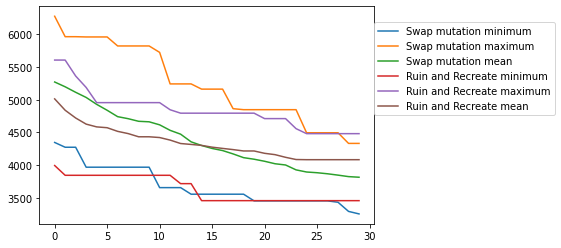

In [94]:
import numpy

def resultsShort():
    SwapList = []
    RuinNRecreateList = []
    
    for i in range(30):
        SwapList.append(swapShort(30))
        RuinNRecreateList.append(ruinAndRecreateShort(30))
        
        # turning both lists into numpy arrays because it works out max , min and average calculations
        Array1 = numpy.array(SwapList) 
        Array2 = numpy.array(RuinNRecreateList)

    plt.plot(Array1.min(axis=0))
    plt.plot(Array1.max(axis=0))
    plt.plot(Array1.mean(axis=0))
    
    plt.plot(Array2.min(axis=0))
    plt.plot(Array2.max(axis=0))
    plt.plot(Array2.mean(axis=0))
    plt.legend(["Swap mutation minimum","Swap mutation maximum", "Swap mutation mean", "Ruin and Recreate minimum", "Ruin and Recreate maximum", "Ruin and Recreate mean"], loc=(1,0.5))
    plt.show()
    
results()